<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)" data-toc-modified-id="-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)</center></a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Task-0." data-toc-modified-id="Task-0.-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Task 0.</a></span></li><li><span><a href="#Task-1." data-toc-modified-id="Task-1.-1.0.0.2"><span class="toc-item-num">1.0.0.2&nbsp;&nbsp;</span>Task 1.</a></span></li><li><span><a href="#Task-2:" data-toc-modified-id="Task-2:-1.0.0.3"><span class="toc-item-num">1.0.0.3&nbsp;&nbsp;</span>Task 2:</a></span></li><li><span><a href="#Task-3:" data-toc-modified-id="Task-3:-1.0.0.4"><span class="toc-item-num">1.0.0.4&nbsp;&nbsp;</span>Task 3:</a></span></li><li><span><a href="#Task-4:" data-toc-modified-id="Task-4:-1.0.0.5"><span class="toc-item-num">1.0.0.5&nbsp;&nbsp;</span>Task 4:</a></span></li><li><span><a href="#Task-5:" data-toc-modified-id="Task-5:-1.0.0.6"><span class="toc-item-num">1.0.0.6&nbsp;&nbsp;</span>Task 5:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.7"><span class="toc-item-num">1.0.0.7&nbsp;&nbsp;</span>Вопросы:</a></span></li><li><span><a href="#Task-6:" data-toc-modified-id="Task-6:-1.0.0.8"><span class="toc-item-num">1.0.0.8&nbsp;&nbsp;</span>Task 6:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.9"><span class="toc-item-num">1.0.0.9&nbsp;&nbsp;</span>Вопросы:</a></span></li></ul></li></ul></li></ul></li></ul></div>

# <center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Ещё раз (как и в задании 1) считайте в переменные tr_mcc_codes, tr_types, transactions и customers_gender_train. В transactions опять считайте только первые 1000000 строк.

In [4]:
### Type your code here
from google.colab import drive
drive.mount("/content/drive")
mcc_path="/content/drive/My Drive/data/tr_mcc_codes.csv"
types_path="/content/drive/My Drive/data/tr_types.csv"
transactions_path="/content/drive/My Drive/data/transactions.csv"
gender_path="/content/drive/My Drive/data/gender_train.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data_mcc = pd.read_csv(mcc_path, sep=';')
data_types = pd.read_csv(types_path, sep=';')
data_gender = pd.read_csv(gender_path, sep=',')
data_transactions = pd.read_csv(transactions_path, sep=',', nrows=1000000)

In [47]:

data_mcc.head()


,mcc_code,mcc_description
0,742,Ветеринарные услуги
1,1711,"Генеральные подрядчики по вентиляции, теплосна..."
2,1731,Подрядчики по электричеству
3,1799,"Подрядчики, специализированная торговля — нигд..."
4,2741,Разнообразные издательства/печатное дело


In [ ]:
data_types.head()

,tr_type,tr_description
0,3200,Плата за предоставление услуг посредством моби...
1,3210,Плата за предоставление отчета по счету карты ...
2,3800,Плата за обслуживание банковской карты (за пер...
3,4000,Плата за получение наличных в Сбербанке
4,4001,Плата за получение наличных в Сбербанке (в дру...


In [ ]:
data_gender.head()

,customer_id,gender
0,10928546,1
1,69348468,1
2,61009479,0
3,74045822,0
4,27979606,1


In [ ]:
data_transactions.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN
4,39026145,2 15:33:42,5499,1010,-920.83,NaN


#### Task 0.
Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [6]:
### Type your code here
result_1 = pd.merge(data_transactions,
                 data_gender[['customer_id','gender']],
                 on='customer_id',
                 how='left')
result_2 = pd.merge(result_1,
                    data_mcc,
                    on='mcc_code',
                    how='inner')
result_3 = pd.merge(result_2,
                    data_types,
                    on='tr_type',
                    how='inner')
table = result_3
table

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
...,...,...,...,...,...,...,...,...,...
999579,36837532,18 23:38:60,3000,6000,1297824.89,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ
999580,6808459,206 19:00:10,3000,6000,124693.24,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ
999581,83759123,90 22:40:57,3000,6000,218976.79,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ
999582,89619970,104 23:39:35,3000,6000,408307.49,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ


#### Task 1.
1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount). (*)

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

##### Пояснения:
(\*) Если в результате для мужчин получились значения [-1,-3,-5], а для женщин [-1,-2,-3],  
то модуль разницы между средними арифметическими -3 и -2 будет равен 1.

(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

(\***) Округление не нужно производить отдельно по средним тратам женщин и мужчин, а только в самом конце, когда получите значение модуля разницы трат.

In [ ]:
### Type your code here
table_waste = table[table.amount<0]
gender_1_mean_waste = (table_waste[table_waste.gender == 1.0]).amount.mean()
gender_2_mean_waste = (table_waste[table_waste.gender == 0.0]).amount.mean()
result = abs(gender_2_mean_waste-gender_1_mean_waste)
result

32718.05492021877

**Ответ: 32718.05**

#### Task 2:
1. Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. (\*)
2. Оставьте только наблюдения с отрицательным значением amount. Посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10. 
3. Определите отношение максимальной дисперсии к минимальной.

Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате "123456" без дробной части.

##### Пояснения:
(\*) Для конкатенации значений в столбцах можно использовать метод .astype(str) для серии и складывать соответствующие серии. Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

(\**) Для одновременного подсчета количества наблюдений и дисперсии по категориям можно воспользоваться функцией .agg()

In [ ]:
### Type your code here
table_2 = table.copy()
table_2['mcc_type'] = table_2['mcc_code'].astype(str) + table_2['tr_type'].astype(str)
table_2 = table_2[table_2.amount < 0]
table_2

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,mcc_type
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,48141030
...,...,...,...,...,...,...,...,...,...,...
999562,4181983,336 11:41:14,4900,2320,-3571.01,888918,NaN,"Коммунальные услуги — электричество, газ, сани...",Безналичный перевод денежных средств через POS,49002320
999563,14892960,61 12:28:52,4900,2320,-718.69,NaN,NaN,"Коммунальные услуги — электричество, газ, сани...",Безналичный перевод денежных средств через POS,49002320
999564,14892960,61 12:30:47,4900,2320,-35575.31,NaN,NaN,"Коммунальные услуги — электричество, газ, сани...",Безналичный перевод денежных средств через POS,49002320
999565,62693770,333 19:26:37,4900,2320,-72385.87,888917,0.0,"Коммунальные услуги — электричество, газ, сани...",Безналичный перевод денежных средств через POS,49002320


In [ ]:
f = lambda x: x.tr_datetime.count() >= 10
gb = table_2.groupby('mcc_type').filter(f)
gb = gb.groupby('mcc_type').amount.agg([lambda x: np.std(x)])
gb = gb.rename(columns={'<lambda>':'std_'})
result = gb.std_.max() / gb.std_.min()
result

2941.964564562118

**Ответ: 2942**

#### Task 3:
1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 5 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям "max_income". (\*)
2. Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
    - 1) Покупка. POS ТУ СБ РФ	
    - 2) Списание после проведения претензионной работы	
    - 3) Плата за получение наличных. Россия	
    - 4) Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте	
    - 5) Плата за получение наличных в АТМ. Россия	 
    - 6) Наличные. Зарубеж. банк	
    - 7) Возврат покупки. POS ТУ Россия

##### Пояснения:
(\*) Если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8], то 5 минимальных из них: [1,2,3,4,5]

In [ ]:
### Type your code here
table_inc = table[table.amount > 0]
gb = table_inc.groupby(['tr_type', 'gender']).amount.agg(max_income='max')
gb

max_income
tr_type gender            
1010    0.0       24839.83
        1.0       28803.87
1100    0.0     2097006.17
        1.0      163727.26
1110    0.0      393035.26
...                    ...
7074    1.0     2245915.77
7075    0.0        6737.75
        1.0      437953.58
8100    1.0       64682.37
8145    0.0      320145.86

[72 rows x 1 columns]

In [ ]:
gb=gb.reset_index()
gb_gender_0 = gb[gb.gender==0.0]
gb_gender_0=gb_gender_0.sort_values(by='max_income')
gb_gender_1 = gb[gb.gender==1.0]
gb_gender_1=gb_gender_1.sort_values(by='max_income')

In [ ]:
gb_gender_0 = pd.merge(gb_gender_0,
                    data_types,
                    on='tr_type',
                    how='inner')
gb_gender_0.head()

,tr_type,gender,max_income,tr_description
0,4051,0.0,1122.96,Плата за перевод на карту (с карты) через АТМ ...
1,4110,0.0,2245.92,Плата за получение наличных в АТМ. Россия
2,4210,0.0,2245.92,Плата за получение наличных в АТМ. Зарубеж.
3,2370,0.0,2335.75,Списание с карты на карту по операции <перевод...
4,4100,0.0,5041.86,Плата за получение наличных. Россия


In [ ]:
gb_gender_1 = pd.merge(gb_gender_1,
                    data_types,
                    on='tr_type',
                    how='inner')
gb_gender_1.head()

,tr_type,gender,max_income,tr_description
0,4110,1.0,2245.92,Плата за получение наличных в АТМ. Россия
1,2020,1.0,2245.92,Выдача наличных через POS Сбербанка
2,1010,1.0,28803.87,Покупка. POS ТУ СБ РФ
3,8100,1.0,64682.37,Списание после проведения претензионной работы
4,6000,1.0,79280.83,Возврат покупки. ТУ СБ РФ


Плата за получение наличных в АТМ. Россия

**Ответ: 5**

#### Task 4:
1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**): 
    - 1) gender == 0 - женщины, gender == 1 - мужчины
    - 2) gender == 1 - женщины, gender == 0 - мужчины
    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских
    
##### Пояснения:
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можо использовать строковые методы для датафрейма - .str.split(), например. Либо же реализовывать логику выделения подстроки с помощью метода apply. <br>
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.

In [7]:
### Type your code here
date_split=table.tr_datetime.str.split(n=1,expand=True)
trans_day = table.copy()
trans_day["tr_day"] = date_split[0]
trans_day

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,tr_day
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,6
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,8
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,11
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,11
...,...,...,...,...,...,...,...,...,...,...
999579,36837532,18 23:38:60,3000,6000,1297824.89,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,18
999580,6808459,206 19:00:10,3000,6000,124693.24,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,206
999581,83759123,90 22:40:57,3000,6000,218976.79,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,90
999582,89619970,104 23:39:35,3000,6000,408307.49,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,104


In [22]:
f = lambda x: x.mcc_code.nunique() >= 75
gb = trans_day.groupby('tr_day').filter(f)
gb_in = gb[gb.amount > 0]
gb_out = gb[gb.amount < 0]
gb_abs = gb.copy();
gb_abs.amount = np.abs(gb_abs.amount)
gb_in = gb_in.groupby(['mcc_code', 'gender']).amount.agg(mean_in='mean',median_in=np.median)
gb_out = gb_out.groupby(['mcc_code', 'gender']).amount.agg(mean_out='mean',median_out=np.median)
gb_abs = gb_abs.groupby(['mcc_code', 'gender']).amount.agg(mean_amount='mean',median_amount=np.median)

gb_in=gb_in.reset_index()
gb_out=gb_out.reset_index()
gb_abs=gb_abs.reset_index()

In [50]:
gb_out_r = pd.merge(gb_out,
                    data_mcc,
                    on='mcc_code',
                    how='inner')
gb_out_r = gb_out_r.sort_values(by='mean_out')
pd.options.display.max_rows = 100
gb_out_r.head(100)

,mcc_code,gender,mean_out,median_out,mcc_description
52,5039,1.0,-1.193251e+06,-238067.070,Строительные материалы — нигде более не класси...
12,3351,1.0,-1.047592e+06,-1047591.690,Агентства по аренде автомобилей
237,6010,1.0,-8.526618e+05,-128017.200,Финансовые институты — снятие наличности вручную
329,8299,1.0,-7.619132e+05,-16844.370,Образовательные услуги
148,5681,1.0,-7.441575e+05,-303872.400,Изготовление и продажа меховых изделий
2,1711,0.0,-6.748977e+05,-674897.690,"Генеральные подрядчики по вентиляции, теплосна..."
334,8699,0.0,-5.211075e+05,-521107.480,"Организации, членства, нигде ранее не классифи..."
199,5946,1.0,-4.778836e+05,-22122.270,Магазины фотооборудования и фотоприборов
250,7011,0.0,-4.594801e+05,-146321.415,"Отели, мотели, базы отдыха, сервисы бронирования"
32,4722,1.0,-4.467433e+05,-161363.880,Туристические агентства и организаторы экскурсий


In [52]:
gb_in_r = pd.merge(gb_in,
                    data_mcc,
                    on='mcc_code',
                    how='inner')
gb_in_r = gb_in_r.sort_values(by='mean_in',ascending=False)
gb_in_r.head(100)

,mcc_code,gender,mean_in,median_in,mcc_description
0,3000,0.0,1.186817e+06,1491647.420,"Авиалинии, авиакомпании"
30,5309,1.0,6.413442e+05,641344.155,Беспошлинные магазины Duty Free
91,6011,1.0,3.690670e+05,112295.790,Финансовые институты — снятие наличности автом...
7,4511,0.0,3.566089e+05,46512.690,"Авиалинии, авиакомпании, нигде более не класси..."
2,3501,1.0,3.244338e+05,320166.525,"Жилье — отели, мотели, курорты"
58,5681,1.0,3.221317e+05,322131.700,Изготовление и продажа меховых изделий
111,8099,1.0,3.007281e+05,300728.120,"Практикующие врачи, медицинские услуги, нигде ..."
10,4722,1.0,2.910883e+05,387981.950,Туристические агентства и организаторы экскурсий
90,6011,0.0,2.507791e+05,112295.790,Финансовые институты — снятие наличности автом...
97,6536,1.0,2.466587e+05,247050.730,Денежные переводы MasterCard MoneySend


In [33]:
pd.options.display.max_rows = 5
gb_abs_r = pd.merge(gb_abs,
                    data_mcc,
                    on='mcc_code',
                    how='inner')
mask = gb_abs_r.index[gb_abs_r['mcc_description']=='Флористика'].tolist()
gb_abs_r.iloc[[226,227]]

,mcc_code,gender,mean_amount,median_amount,mcc_description
226,5992,0.0,22291.486845,13890.99,Флористика
227,5992,1.0,26093.348491,19090.28,Флористика


In [40]:
gb_abr_r=gb_abs_r.set_index('mcc_description')
gb_abr_r.loc["Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков"]

,mcc_code,gender,mean_amount,median_amount
mcc_description,,,,
"Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков",5813,0.0,15601.340943,10106.62
"Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков",5813,1.0,29649.440630,13475.49


In [48]:
gb_abr_r.loc["Ценные бумаги: брокеры/дилеры"]

,mcc_code,gender,mean_amount,median_amount
mcc_description,,,,
Ценные бумаги: брокеры/дилеры,6211,0.0,6737.750000,6737.75
Ценные бумаги: брокеры/дилеры,6211,1.0,74039.339308,11229.58


1 - мужчина, 0 - женщина

Ответ: 1,3,5

#### Task 5:
1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в функцию plot_pivot_table, расположенную ниже.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
    - 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
    - 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
    - 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
    - 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

In [74]:
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, 
                fmt='.3g', annot_kws={"size": 14, "fontsize": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()

In [57]:
# Type your code here
table_waste = table[table.amount < 0]
table_waste.amount = np.abs(table_waste.amount)
table_waste

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
0,39026145,0 10:23:26,4814,1030,2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
1,39026145,6 07:08:31,4814,1030,5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
2,39026145,8 07:06:10,4814,1030,1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
3,39026145,11 08:49:03,4814,1030,2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
4,39026145,11 14:12:08,4814,1030,2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
...,...,...,...,...,...,...,...,...,...
999562,4181983,336 11:41:14,4900,2320,3571.01,888918,NaN,"Коммунальные услуги — электричество, газ, сани...",Безналичный перевод денежных средств через POS
999563,14892960,61 12:28:52,4900,2320,718.69,NaN,NaN,"Коммунальные услуги — электричество, газ, сани...",Безналичный перевод денежных средств через POS
999564,14892960,61 12:30:47,4900,2320,35575.31,NaN,NaN,"Коммунальные услуги — электричество, газ, сани...",Безналичный перевод денежных средств через POS
999565,62693770,333 19:26:37,4900,2320,72385.87,888917,0.0,"Коммунальные услуги — электричество, газ, сани...",Безналичный перевод денежных средств через POS


In [63]:
table_waste['amount_cat'], categs = pd.qcut(table_waste.amount, 5, labels=['Very low','Low','Middle','High','Very high'],
         retbins=True)
table_waste

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,amount_cat
0,39026145,0 10:23:26,4814,1030,2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very low
1,39026145,6 07:08:31,4814,1030,5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Low
2,39026145,8 07:06:10,4814,1030,1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very low
3,39026145,11 08:49:03,4814,1030,2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very low
4,39026145,11 14:12:08,4814,1030,2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very low
...,...,...,...,...,...,...,...,...,...,...
999562,4181983,336 11:41:14,4900,2320,3571.01,888918,NaN,"Коммунальные услуги — электричество, газ, сани...",Безналичный перевод денежных средств через POS,Low
999563,14892960,61 12:28:52,4900,2320,718.69,NaN,NaN,"Коммунальные услуги — электричество, газ, сани...",Безналичный перевод денежных средств через POS,Very low
999564,14892960,61 12:30:47,4900,2320,35575.31,NaN,NaN,"Коммунальные услуги — электричество, газ, сани...",Безналичный перевод денежных средств через POS,High
999565,62693770,333 19:26:37,4900,2320,72385.87,888917,0.0,"Коммунальные услуги — электричество, газ, сани...",Безналичный перевод денежных средств через POS,Very high


In [71]:
table_cat = table.copy()
table_cat['categ'] = table_waste.amount_cat
table_cat['categ'] = table_cat.categ.cat.add_categories('Income')
table_cat['categ'] = table_cat.categ.fillna("Income")
table_cat

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,categ
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very low
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Low
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very low
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very low
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very low
...,...,...,...,...,...,...,...,...,...,...
999579,36837532,18 23:38:60,3000,6000,1297824.89,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,Income
999580,6808459,206 19:00:10,3000,6000,124693.24,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,Income
999581,83759123,90 22:40:57,3000,6000,218976.79,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,Income
999582,89619970,104 23:39:35,3000,6000,408307.49,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,Income


In [72]:
table_cat['tr_hour']= table_cat.tr_datetime.apply(lambda x: (x.split()[1]).split(':')[0])
table_cat

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,categ,tr_hour
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very low,10
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Low,07
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very low,07
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very low,08
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,Very low,14
...,...,...,...,...,...,...,...,...,...,...,...
999579,36837532,18 23:38:60,3000,6000,1297824.89,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,Income,23
999580,6808459,206 19:00:10,3000,6000,124693.24,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,Income,19
999581,83759123,90 22:40:57,3000,6000,218976.79,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,Income,22
999582,89619970,104 23:39:35,3000,6000,408307.49,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,Income,23


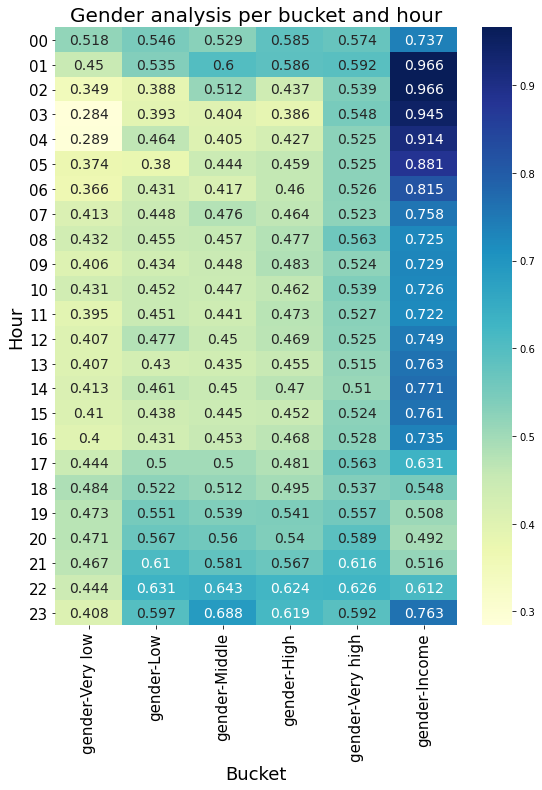

In [75]:
pivot = table_cat.pivot_table(['gender'], index=['tr_hour'],
                 columns='categ')
plot_pivot_table(pivot)

**Ответ: 1, 3, 5**

#### Task 6:
1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) 2 из полученных MCC-кодов связаны с финансовыми институтами
    - 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)
    - 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
    - 4) Денежные переводы имеют как минимум 3 явных минимума средних
    - 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 

In [99]:
# Type your code here
date_split=table.tr_datetime.str.split(n=1,expand=True)
trans_day = table.copy()
trans_day["tr_day"] = date_split[0]
trans_day["tr_day"]=trans_day["tr_day"].astype('int64')

f = lambda x: x.tr_datetime.count() > 60000
gb = trans_day.groupby('mcc_code').filter(f)
gb = gb.groupby(['tr_day','mcc_code']).amount.agg(mean_amount=np.mean)
gb = gb.reset_index()
gb_desc = pd.merge(gb,
                    data_mcc,
                    on='mcc_code',
                    how='inner')
gb_desc = gb_desc.drop(columns=['mcc_code'])
gb_desc = gb_desc.set_index(['tr_day','mcc_description'])
gb_desc = gb_desc.unstack(level = 1)
gb_desc = gb_desc.reset_index()
gb_desc = gb_desc.set_index('tr_day')


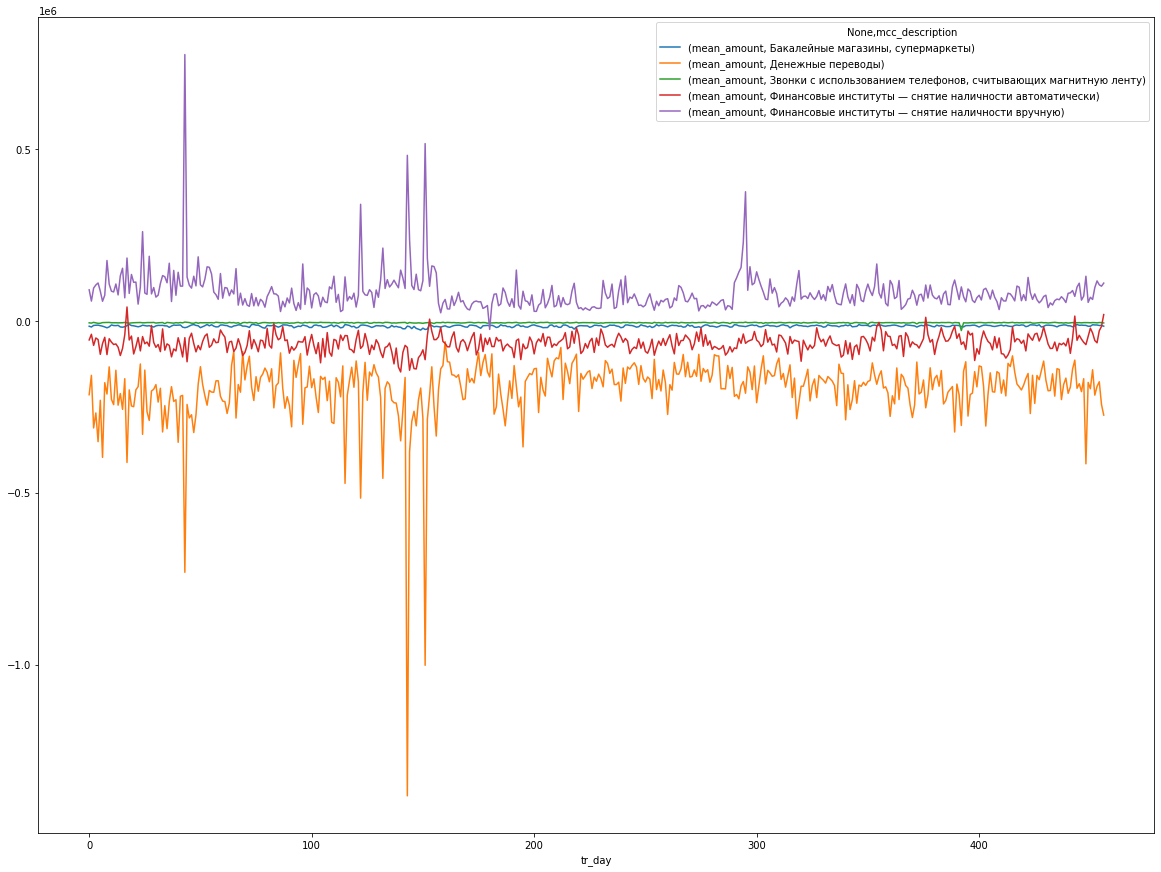

In [101]:

gb_desc.plot(figsize=(20, 15))

**Ответ: 1, 2, 4**